Copyright @ cb_park@korea.ac.kr (Cheonbok Park), joonleesky@kaist.ac.kr (Hojoon Lee)

## Convolutional Neural Network

In [148]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Below are the all identical neural network with different expression

In [149]:
class CNN1(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN1, self).__init__()
        
        self.conv = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2)

    def forward(self, x):
        out = self.conv(x)
        out = self.relu(out)
        out = self.maxpool(out)
        return out  # input image = batch_size x 3 x 16 x 16

    
class CNN2(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN2, self).__init__()

        self.layer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2))

    def forward(self, x):
        out = self.layer(x)
        return out  # input image = batch_size x 3 x 16 x 16      
      

class CNN3(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN3, self).__init__()
        layer = []
        
        layer.append(nn.Conv2d(3, 64, kernel_size=3, padding=1))
        layer.append(nn.ReLU())
        layer.append(nn.MaxPool2d(2))
        
        self.layer = nn.Sequential(*layer)

    def forward(self, x):
        out = self.layer(x)
        return out  # input image = batch_size x 3 x 16 x 16

In [150]:
sample_image = Variable(torch.zeros(64, 3, 32, 32))

In [151]:
cnn = CNN1()
print(cnn)
output = cnn(sample_image)
print(output.size())

CNN1(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([64, 64, 16, 16])


In [152]:
cnn = CNN2()
print(cnn)
output = cnn(sample_image)
print(output.size())

CNN2(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)
torch.Size([64, 64, 16, 16])


In [153]:
cnn = CNN3()
print(cnn)
output = cnn(sample_image)
print(output.size())

CNN3(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)
torch.Size([64, 64, 16, 16])


### Let's practice creating the Convolutional Neural Network

In [154]:
class CNN_prac(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN_prac, self).__init__()
        self.conv1 = nn.Conv2d(3, 512, 3, 1, 1) 
        self.conv2 = nn.Conv2d(512, 256, 3, 1, 1) 
        self.conv3 = nn.Conv2d(256, 256, 3, 2, 1) 
        self.conv4 = nn.Conv2d(256, 128, 3, 2, 1)

        self.linear = nn.Linear(256*4*4, 10)
    def forward(self, x):
        out=self.conv1(x)
        out=self.conv2(out)
        out=self.conv3(out)
        out=self.conv4(out)
        out = out.contiguous().view(-1, 256*4*4)
        out = self.linear(out)
        return out

In [155]:
cnn_prac=CNN_prac()
sample_image = Variable(torch.zeros(64, 3, 32, 32))
output=cnn_prac(sample_image)
print(output.size()) 
print(cnn_prac)

torch.Size([128, 10])
CNN_prac(
  (conv1): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear): Linear(in_features=4096, out_features=10, bias=True)
)


## 2.1 VGG-19

### Let's create by yourself

In [156]:
class ConvBlock1(nn.Module):

    def __init__(self, in_dim, out_dim):
        super(ConvBlock1, self).__init__()
        
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        # in_channels, out_channels, kernel_size
        self.main = nn.Sequential(nn.Conv2d(self.in_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.MaxPool2d(2)
                                  )
        
    def forward(self, x):
        out = self.main(x)
        return out

In [157]:
class ConvBlock2(nn.Module):

    def __init__(self, in_dim, out_dim):
        super(ConvBlock2, self).__init__()
        
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.main = nn.Sequential(nn.Conv2d(self.in_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.MaxPool2d(2)
                                 )
        
    def forward(self, x):
        out = self.main(x)
        return out

In [158]:
class VGG19(nn.Module):
  
    def __init__(self):
        super(VGG19, self).__init__()
        
        self.convlayer1 = ConvBlock1(3, 64)
        self.convlayer2 = ConvBlock1(64, 128)
        self.convlayer3 = ConvBlock2(128, 256)
        self.convlayer4 = ConvBlock2(256, 512)
        self.convlayer5 = ConvBlock2(512, 512)
        self.linear = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
    def forward(self, input):
        out = self.convlayer1(input)    
        out = self.convlayer2(out)
        out = self.convlayer3(out)
        out = self.convlayer4(out)
        out = self.convlayer5(out).squeeze() # 16 x 512 x 1 x 1에서 뒤 1 x 1 축약 
        out = self.linear(out)
        return out


## Test Your Impelemetation

In [159]:
vgg19 = VGG19()
print(vgg19)

output = vgg19(sample_image)
print(output.size())

VGG19(
  (convlayer1): ConvBlock1(
    (main): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (convlayer2): ConvBlock1(
    (main): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2,

In [160]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
if count_parameters(vgg19) == 20365002:
    print('success!')
else:
    print(count_parameters(vgg19))

success!


# 2.2 CIFAR-10 Dataset

50000 training images  \
10000 validation images \
\
10 classes = [airplane, car, truck, frog, ...]
\
for more info, https://www.cs.toronto.edu/~kriz/cifar.html 



In [161]:
# set hyperparameters
batch_size = 64
learning_rate = 0.0001
num_epochs = 4

In [162]:
# import torchvision.datasets as datasets

train_dataset = datasets.CIFAR10(root='./data/',       # 50000장
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = datasets.CIFAR10(root='./data/',        # 10000장
                           train=False, 
                           transform=transforms.ToTensor())

# 데이터 로더
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=True)

Files already downloaded and verified


In [163]:
import matplotlib.pyplot as plt
import numpy as np


def show_cifar10():
    for images, _ in train_loader:
        plt.figure(figsize=(8,8))
        images_to_show = images.numpy().transpose((0,2,3,1))

        for a in range(331, 340):  
            plt.subplot(a)
            plt.imshow(images_to_show[a-331])
            plt.xticks([])
            plt.yticks([])    
            plt.show()   
        break
    return 0


def loss_plot(acc):  
    plt.plot(acc)
    plt.xlabel('log')
    plt.ylabel('accuracy')
    plt.grid(True)
    plt.show()
    return 0

import time
class Timer():    
    def __init__(self):
        self.cur_t = time.time()

    def tic(self):
        self.cur_t = time.time()

    def toc(self):
        return time.time() - self.cur_t

    def tocStr(self, t=-1):
        if (t == -1):
            return str(datetime.timedelta(seconds=np.round(time.time() - self.cur_t, 3)))[:-4]
        else:
            return str(datetime.timedelta(seconds=np.round(t, 3)))[:-4]
          

def test_on_cifar10(model, accuracy_list):  
    # Test the Model       
    model.eval()    # Change model to 'eval' mode (BN uses moving mean/var).
    correct = 0
    total = 0
    correct_class = [0]*10
    count_class = [0]*10

    # Create confusuion matrix of size 10x10 because of 10 classes
    confusion_matrix = np.zeros((10,10))

    for j, (images, labels) in enumerate(test_loader):
        images = Variable(images).cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum()
        # compare the predictions and true lables for each class
        correct_tensor = np.squeeze(predicted.cpu() == labels).cpu().numpy()
        if (j+1)%100==0:
            break

        # Test accuracy for each class
        for item in range(labels.size(0)):
            label = labels.data[item]
            correct_class[label] += correct_tensor[item].item()
            count_class[label] += 1

            # Update confusion matrix
            confusion_matrix[label][predicted.data[item]] += 1

    print('Test Accuracy of the model on the 100 test images: %d %%' % (100 * correct.float() / total))
    accuracy_list.append(100 * correct.float() / total)

    return accuracy_list, confusion_matrix, correct_class, count_class

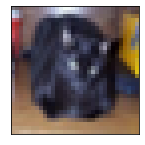

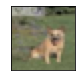

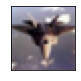

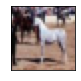

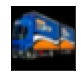

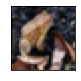

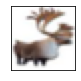

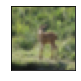

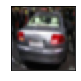

0

In [164]:
show_cifar10()

## Train Cifar-10 with your VGG-19

Epoch [1/4], Iter [100/781] Loss: 2.1976, iter_time: 7.67
Test Accuracy of the model on the 100 test images: 27 %
Epoch [1/4], Iter [200/781] Loss: 2.0213, iter_time: 10.30
Test Accuracy of the model on the 100 test images: 29 %
Epoch [1/4], Iter [300/781] Loss: 1.4682, iter_time: 9.81
Test Accuracy of the model on the 100 test images: 39 %
Epoch [1/4], Iter [400/781] Loss: 1.6289, iter_time: 9.87
Test Accuracy of the model on the 100 test images: 36 %
Epoch [1/4], Iter [500/781] Loss: 1.8616, iter_time: 9.92
Test Accuracy of the model on the 100 test images: 43 %
Epoch [1/4], Iter [600/781] Loss: 1.5983, iter_time: 9.79
Test Accuracy of the model on the 100 test images: 45 %
Epoch [1/4], Iter [700/781] Loss: 1.6211, iter_time: 9.84
Test Accuracy of the model on the 100 test images: 50 %


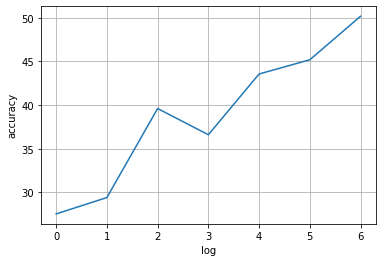

Epoch [2/4], Iter [100/781] Loss: 1.4655, iter_time: 15.83
Test Accuracy of the model on the 100 test images: 50 %
Epoch [2/4], Iter [200/781] Loss: 1.2352, iter_time: 9.48
Test Accuracy of the model on the 100 test images: 52 %
Epoch [2/4], Iter [300/781] Loss: 1.1984, iter_time: 9.51
Test Accuracy of the model on the 100 test images: 51 %
Epoch [2/4], Iter [400/781] Loss: 1.0589, iter_time: 9.52
Test Accuracy of the model on the 100 test images: 56 %
Epoch [2/4], Iter [500/781] Loss: 1.1559, iter_time: 9.50
Test Accuracy of the model on the 100 test images: 57 %
Epoch [2/4], Iter [600/781] Loss: 1.1136, iter_time: 9.53
Test Accuracy of the model on the 100 test images: 56 %
Epoch [2/4], Iter [700/781] Loss: 1.1826, iter_time: 9.52
Test Accuracy of the model on the 100 test images: 59 %


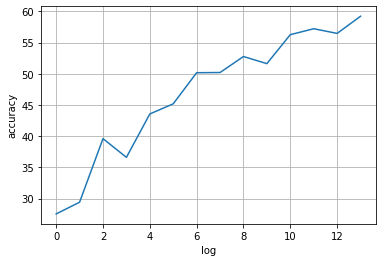

Epoch [3/4], Iter [100/781] Loss: 1.1665, iter_time: 15.50
Test Accuracy of the model on the 100 test images: 58 %
Epoch [3/4], Iter [200/781] Loss: 1.2476, iter_time: 9.62
Test Accuracy of the model on the 100 test images: 60 %
Epoch [3/4], Iter [300/781] Loss: 0.9970, iter_time: 9.82
Test Accuracy of the model on the 100 test images: 59 %
Epoch [3/4], Iter [400/781] Loss: 1.3436, iter_time: 10.15
Test Accuracy of the model on the 100 test images: 60 %
Epoch [3/4], Iter [500/781] Loss: 0.9144, iter_time: 9.88
Test Accuracy of the model on the 100 test images: 61 %
Epoch [3/4], Iter [600/781] Loss: 0.9920, iter_time: 9.85
Test Accuracy of the model on the 100 test images: 63 %
Epoch [3/4], Iter [700/781] Loss: 1.0225, iter_time: 9.92
Test Accuracy of the model on the 100 test images: 62 %


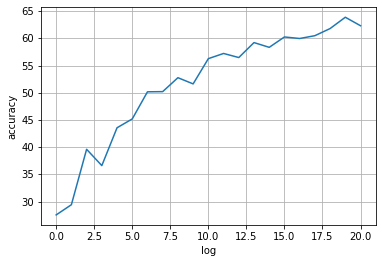

Epoch [4/4], Iter [100/781] Loss: 1.0771, iter_time: 16.07
Test Accuracy of the model on the 100 test images: 64 %
Epoch [4/4], Iter [200/781] Loss: 0.9479, iter_time: 9.68
Test Accuracy of the model on the 100 test images: 64 %
Epoch [4/4], Iter [300/781] Loss: 0.9255, iter_time: 9.84
Test Accuracy of the model on the 100 test images: 65 %
Epoch [4/4], Iter [400/781] Loss: 0.7427, iter_time: 9.86
Test Accuracy of the model on the 100 test images: 64 %
Epoch [4/4], Iter [500/781] Loss: 0.9940, iter_time: 10.53
Test Accuracy of the model on the 100 test images: 66 %
Epoch [4/4], Iter [600/781] Loss: 0.7797, iter_time: 10.71
Test Accuracy of the model on the 100 test images: 65 %
Epoch [4/4], Iter [700/781] Loss: 0.8887, iter_time: 10.04
Test Accuracy of the model on the 100 test images: 66 %


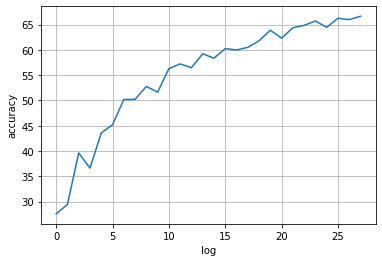

Test Accuracy of 0: 442/600 (74%)
Test Accuracy of 1: 517/622 (83%)
Test Accuracy of 2: 306/652 (47%)
Test Accuracy of 3: 313/646 (48%)
Test Accuracy of 4: 408/642 (64%)
Test Accuracy of 5: 363/637 (57%)
Test Accuracy of 6: 526/619 (85%)
Test Accuracy of 7: 473/647 (73%)
Test Accuracy of 8: 421/664 (63%)
Test Accuracy of 9: 454/607 (75%)


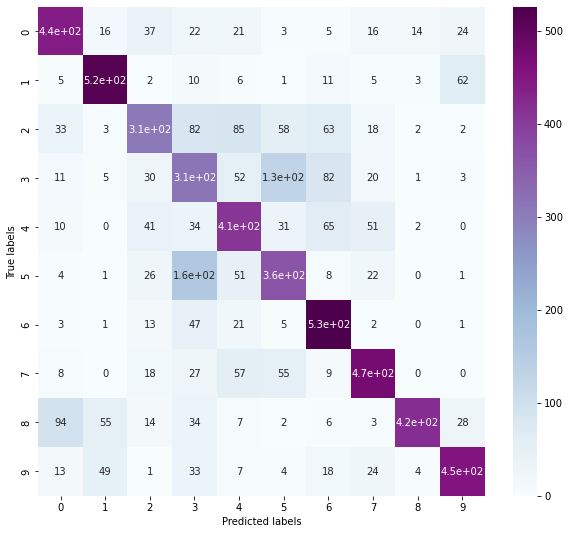

In [165]:
import torchvision.models as models
vgg19 = models.vgg19_bn(pretrained=False)

tell_time = Timer()
iter_time = 0

vgg19 = vgg19.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg19.parameters(), lr=learning_rate)

accuracy_list = []
for epoch in range(num_epochs):
    vgg19.train()
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images).cuda()
        labels = Variable(labels).cuda()

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = vgg19(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f' 
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()    
            (accuracy_list, confusion_matrix, correct_class, count_class) = test_on_cifar10(vgg19, accuracy_list)

    loss_plot(accuracy_list)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for c in range(len(classes)):
        if count_class[c] > 0:
            print('Test Accuracy of {}: {}/{} ({:.0f}%)'.format(c, correct_class[c],
            count_class[c], 100 * correct_class[c] / count_class[c]))

plt.subplots(figsize=(10,9))
ax = sns.heatmap(confusion_matrix, annot=True, cmap="BuPu")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.savefig('cm.png', bbox_inches='tight')

## Train Cifar-10 with pre-trained VGG-19

In [172]:
import torchvision.models as models
pre_vgg=models.vgg19_bn(pretrained=True)

In [173]:
class pretrained_vgg(nn.Module):
    def __init__(self, pre_vgg):
        super(pretrained_vgg, self).__init__()
        self.features = nn.Sequential(   
            *list(pre_vgg.features.children())
        )
        self.linear = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
    def forward(self, x):
        out = self.features(x).squeeze()
        out = self.linear(out)
        return out

Epoch [1/4], Iter [100/781] Loss: 0.9247, iter_time: 3.04
Test Accuracy of the model on the 100 test images: 63 %
Epoch [1/4], Iter [200/781] Loss: 0.7839, iter_time: 4.60
Test Accuracy of the model on the 100 test images: 74 %
Epoch [1/4], Iter [300/781] Loss: 0.8068, iter_time: 4.57
Test Accuracy of the model on the 100 test images: 79 %
Epoch [1/4], Iter [400/781] Loss: 0.4218, iter_time: 4.52
Test Accuracy of the model on the 100 test images: 80 %
Epoch [1/4], Iter [500/781] Loss: 0.4097, iter_time: 4.54
Test Accuracy of the model on the 100 test images: 82 %
Epoch [1/4], Iter [600/781] Loss: 0.5216, iter_time: 4.55
Test Accuracy of the model on the 100 test images: 82 %
Epoch [1/4], Iter [700/781] Loss: 0.5846, iter_time: 4.49
Test Accuracy of the model on the 100 test images: 80 %


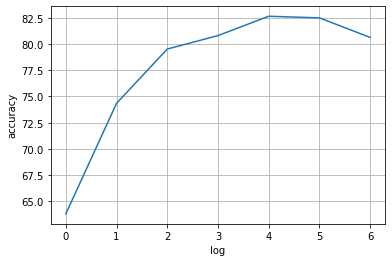

Epoch [2/4], Iter [100/781] Loss: 0.2751, iter_time: 7.01
Test Accuracy of the model on the 100 test images: 85 %
Epoch [2/4], Iter [200/781] Loss: 0.3675, iter_time: 4.50
Test Accuracy of the model on the 100 test images: 85 %
Epoch [2/4], Iter [300/781] Loss: 0.7426, iter_time: 4.51
Test Accuracy of the model on the 100 test images: 81 %
Epoch [2/4], Iter [400/781] Loss: 0.5330, iter_time: 4.54
Test Accuracy of the model on the 100 test images: 85 %
Epoch [2/4], Iter [500/781] Loss: 0.4184, iter_time: 4.49
Test Accuracy of the model on the 100 test images: 85 %
Epoch [2/4], Iter [600/781] Loss: 0.3509, iter_time: 4.55
Test Accuracy of the model on the 100 test images: 83 %
Epoch [2/4], Iter [700/781] Loss: 0.3732, iter_time: 4.55
Test Accuracy of the model on the 100 test images: 86 %


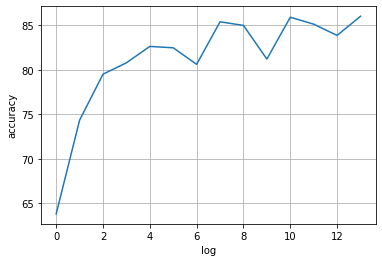

Epoch [3/4], Iter [100/781] Loss: 0.2335, iter_time: 7.14
Test Accuracy of the model on the 100 test images: 87 %
Epoch [3/4], Iter [200/781] Loss: 0.3066, iter_time: 4.61
Test Accuracy of the model on the 100 test images: 85 %
Epoch [3/4], Iter [300/781] Loss: 0.3724, iter_time: 4.63
Test Accuracy of the model on the 100 test images: 85 %
Epoch [3/4], Iter [400/781] Loss: 0.2387, iter_time: 4.61
Test Accuracy of the model on the 100 test images: 84 %
Epoch [3/4], Iter [500/781] Loss: 0.1811, iter_time: 4.62
Test Accuracy of the model on the 100 test images: 86 %
Epoch [3/4], Iter [600/781] Loss: 0.3248, iter_time: 4.69
Test Accuracy of the model on the 100 test images: 86 %
Epoch [3/4], Iter [700/781] Loss: 0.3674, iter_time: 4.67
Test Accuracy of the model on the 100 test images: 88 %


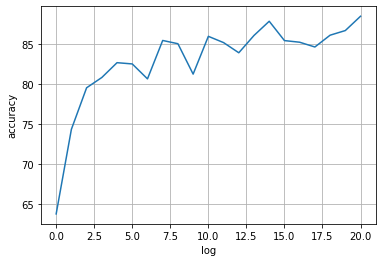

Epoch [4/4], Iter [100/781] Loss: 0.1730, iter_time: 7.24
Test Accuracy of the model on the 100 test images: 88 %
Epoch [4/4], Iter [200/781] Loss: 0.1571, iter_time: 4.78
Test Accuracy of the model on the 100 test images: 87 %
Epoch [4/4], Iter [300/781] Loss: 0.0597, iter_time: 4.69
Test Accuracy of the model on the 100 test images: 86 %
Epoch [4/4], Iter [400/781] Loss: 0.0940, iter_time: 4.71
Test Accuracy of the model on the 100 test images: 86 %
Epoch [4/4], Iter [500/781] Loss: 0.3276, iter_time: 4.69
Test Accuracy of the model on the 100 test images: 85 %
Epoch [4/4], Iter [600/781] Loss: 0.1453, iter_time: 4.74
Test Accuracy of the model on the 100 test images: 88 %
Epoch [4/4], Iter [700/781] Loss: 0.1827, iter_time: 4.69
Test Accuracy of the model on the 100 test images: 85 %


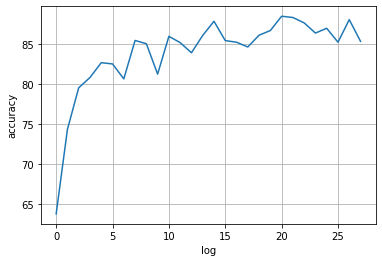

Test Accuracy of 0: 576/612 (94%)
Test Accuracy of 1: 675/685 (99%)
Test Accuracy of 2: 488/643 (76%)
Test Accuracy of 3: 392/635 (62%)
Test Accuracy of 4: 564/613 (92%)
Test Accuracy of 5: 557/652 (85%)
Test Accuracy of 6: 553/611 (91%)
Test Accuracy of 7: 545/630 (87%)
Test Accuracy of 8: 552/606 (91%)
Test Accuracy of 9: 503/649 (78%)


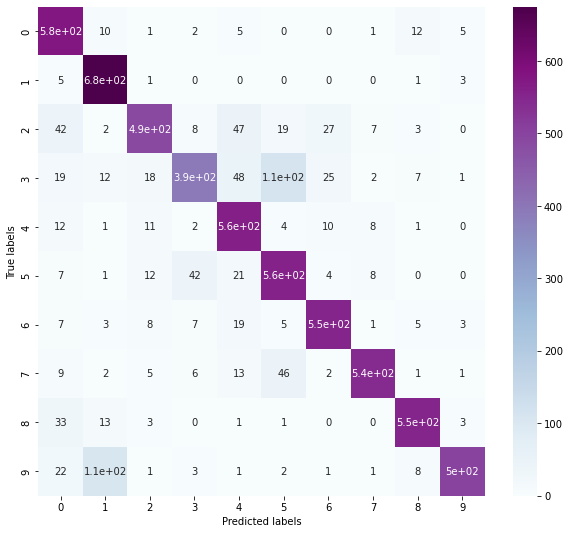

In [174]:
vgg19 = pretrained_vgg(pre_vgg)

tell_time = Timer()
iter_time = 0

vgg19 = vgg19.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg19.parameters(), lr=learning_rate)

accuracy_list = []
for epoch in range(num_epochs):
    vgg19.train()
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images).cuda()
        labels = Variable(labels).cuda()

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = vgg19(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f' 
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()    
            (accuracy_list, confusion_matrix, correct_class, count_class) = test_on_cifar10(vgg19, accuracy_list)

    loss_plot(accuracy_list)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for c in range(len(classes)):
        if count_class[c] > 0:
            print('Test Accuracy of {}: {}/{} ({:.0f}%)'.format(c, correct_class[c],
            count_class[c], 100 * correct_class[c] / count_class[c]))

plt.subplots(figsize=(10,9))
ax = sns.heatmap(confusion_matrix, annot=True, cmap="BuPu")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.savefig('cm.png', bbox_inches='tight')